<a href="https://colab.research.google.com/github/santiagorivas0/Prediccion-de-Abandono-de-Clientes-Bancarios/blob/main/Desafio_FeatureSelection_MuleroRivasQuinteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PREDICCIÓN DEL ABANDONO DE CLIENTES BANCARIOS**


In [ ]:
#LIBRERIAS

#MANIPULACION DE DATOS, CALCULOS Y GRÁFICOS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**IMPORTAMOS LOS DATOS**

In [ ]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA WRANGLING** 

In [ ]:
df1 = df.drop(["Surname", "CustomerId","Tenure","RowNumber"], axis=1)

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_geography = pd.get_dummies(df["Geography"], prefix="Geography")

In [ ]:
df = pd.concat([df, dummy_gender, dummy_geography], axis=1)

**MODELOS PARA DISMINUIR DIMENSIONALIDAD Y AGRUPAR**

BASE PARA MODELIZAR

In [ ]:
df3 = df[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Spain','Exited']]
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain,Exited
0,619,42,0.00,1,1,1,101348.88,0,1,0,1
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,0,1,0,1
3,699,39,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df3.drop('Exited', axis=1)
y = df3['Exited']

PCA


In [ ]:
from sklearn.decomposition import PCA
#generacion PCA todas las variables
pca = PCA()
#trasnformacion
pcaData = pd.DataFrame(pca.fit_transform(df3))
#valores de lasvariables
pca.explained_variance_ratio_

array([5.41184038e-01, 4.58814649e-01, 1.29726454e-06, 1.52638012e-08,
       4.81161063e-11, 4.24773234e-11, 3.72008893e-11, 3.35597949e-11,
       2.88191911e-11, 1.87131787e-11, 9.97334933e-12])

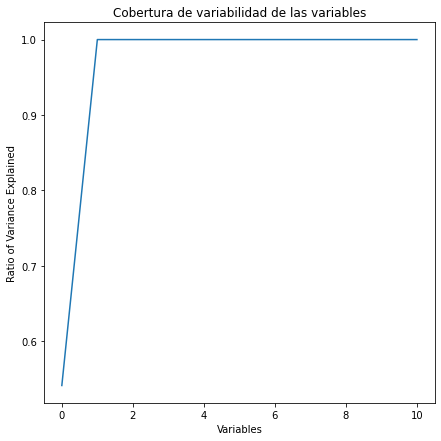

In [ ]:
plt.rcParams['figure.figsize'] = 7, 7
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variables')
plt.ylabel('Ratio of Variance Explained')
plt.title('Cobertura de variabilidad de las variables')
plt.show()

Dado el gráfico nos quedaremos con dos variables que explican la variabilidad de toda nuestro DataBase.

In [ ]:
#Transformacion por la conclusion

pcaData.drop(columns = [5,6,7,8], inplace=True)
pcaData.head()

,0,1,2,3,4,9,10
0,-76157.145981,-7194.761640,30.782512,3.442939,-0.628924,0.834470,0.097187
1,8266.910411,-11846.105623,42.570278,2.043075,0.695305,-0.239881,0.179792
2,83998.633339,-7340.133435,149.305996,2.635136,-0.108572,0.352764,0.546940
3,-76741.325977,304.770458,-49.200427,0.453643,-0.387354,-0.358602,-0.048166
4,47245.526438,24749.993709,-198.940379,3.906928,0.661272,-0.280887,0.282627


In [ ]:
#genero el modelo PCa con n variables(2)
pca = PCA(n_components = 2)

#entreo y trasnformo
X_train = pca.fit_transform(X)

#explicacion de variabilidad de datos
pca.explained_variance_ratio_

array([0.54118404, 0.45881465])

Estos dos componentes del PCA explican la variabilidad

ANALISIS FACTORIAL

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 43.5 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=e5b651a9236ae913a776f756d522382a7f9cd4c90d0cb8354c9edda4d61c19ca
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
print("Valores propios:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[1.58993349 1.34204182 1.09028772 1.02395999 1.00732754 0.99593973
 0.9857966  0.89277775 0.76648679 0.30544857]

Communalities:
[8.52155726e-04 2.20597890e-02 7.06892155e-01 5.66880638e-01
 1.95589022e-03 1.43075229e-03 2.37359726e-05 2.60220037e-03
 8.23201462e-01 8.06076539e-01]

Varianzas especificas:
[0.99914784 0.97794021 0.29310784 0.43311936 0.99804411 0.99856925
 0.99997626 0.9973978  0.17679854 0.19392346]

Cargas de los factores:
[[ 0.0284737   0.00643462]
 [ 0.00431227 -0.14846277]
 [-0.20866886 -0.81446268]
 [ 0.27713627  0.70005437]
 [-0.01132086  0.04275194]
 [ 0.03645319  0.0100954 ]
 [-0.00452887 -0.00179592]
 [-0.00703588 -0.05052422]
 [-0.78453082  0.45575526]
 [ 0.88867886 -0.1277749 ]]


In [ ]:
pd.DataFrame(fa.loadings_ , columns = ['Componente 1', 'Componente 2'], index=X.columns)

,Componente 1,Componente 2
CreditScore,0.028474,0.006435
Age,0.004312,-0.148463
Balance,-0.208669,-0.814463
NumOfProducts,0.277136,0.700054
HasCrCard,-0.011321,0.042752
IsActiveMember,0.036453,0.010095
EstimatedSalary,-0.004529,-0.001796
Gender_Male,-0.007036,-0.050524
Geography_France,-0.784531,0.455755
Geography_Spain,0.888679,-0.127775


**ClUSTERS + ANALISIS DE COMPONENTES PRINCIPALES (USAMOS DATA TRANSFORMADA POR EL PCA DE DOS COMPONENTES)**

KMEANS

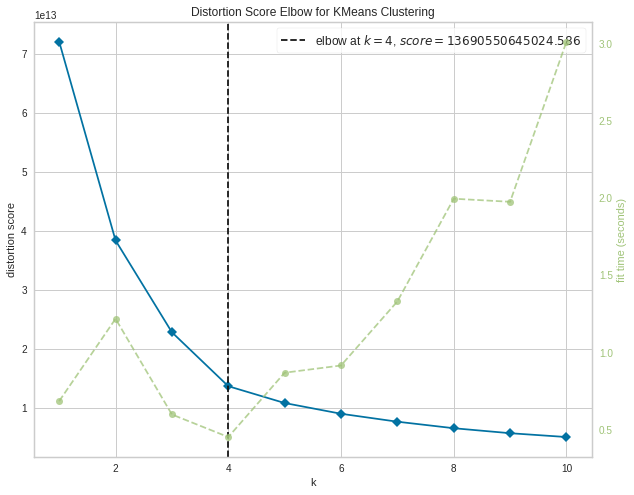

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#metodo del codo
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(pcaData)
visualizer.poof()

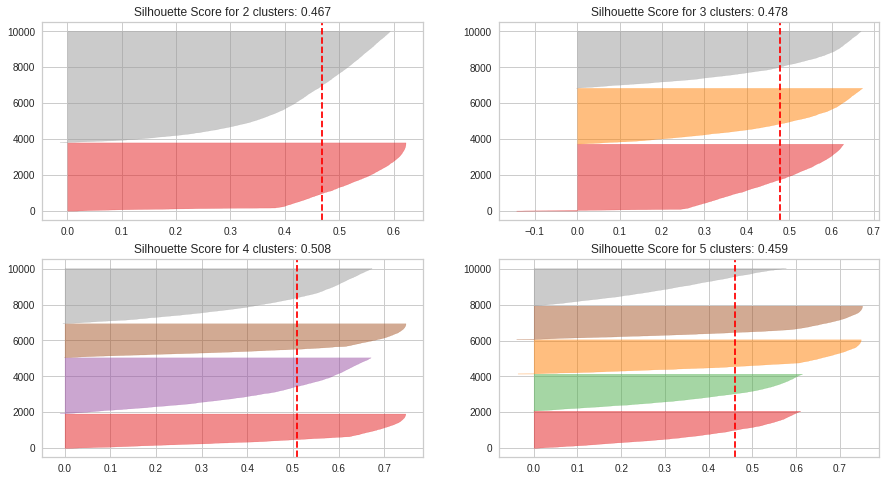

In [ ]:
# Silhouette Scores of PCA Data
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(pcaData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)


Dado el gráfico consideramos mejor modelización cuatro clusters

In [ ]:
#entrenamiento del modelo
modelKM = KMeans(n_clusters = 4)
modelKM.fit(pcaData)

#generacion del clusters
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0   3132    31.32
3   3066    30.66
1   1913    19.13
2   1889    18.89


Hirarchical Clustering


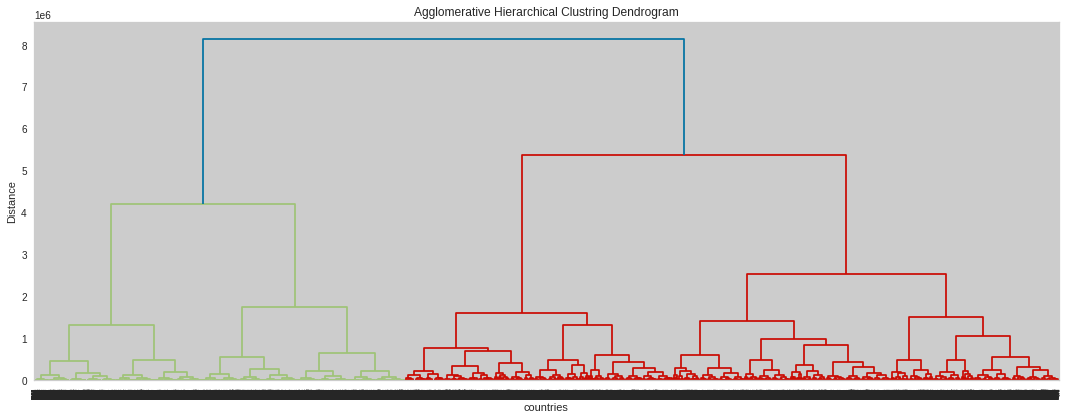

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

link = linkage(pcaData, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

modelAGC = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(pcaData)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
0   3757    37.57
2   2621    26.21
1   1980    19.80
3   1642    16.42


### <u>Hirarchical Clustering Scores</u>:

In [ ]:
from sklearn.metrics import davies_bouldin_score
print('Silhouette Score:', '%.2f'%sil_score(pcaData, sPredAGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(pcaData, sPredAGC))

Silhouette Score: 0.47
Davies Bouldin Score: 0.67


### <u>KMeans Clustering Scores</u>:

In [ ]:
print('Silhouette Score:', '%.2f'%sil_score(pcaData, pcaPredKM))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(pcaData, pcaPredKM))

Silhouette Score: 0.51
Davies Bouldin Score: 0.64


Dadas las metricas nos quedamos con el KMeans + PCA